<a href="https://www.kaggle.com/code/chibuzokelechi/ripple-sandbox?scriptVersionId=187908138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
! pip install --upgrade -q ripple_net

In [2]:
from ripple import ImageEmbedder, TextSearch # import classes
import rich, ripple
import os
from datasets import Dataset, load_dataset

root_dir = '/kaggle/input/svtest2/test_images'
rich.inspect(ripple,methods=True)

2024-07-12 03:29:53.150468: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 03:29:53.150566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 03:29:53.285959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


╭────────────── <module 'ripple' from '/opt/conda/lib/python3.10/site-packages/ripple/__init__.py'> ──────────────╮
│ image_embedder = <module 'ripple.image_embedder' from                                                           │
│                  '/opt/conda/lib/python3.10/site-packages/ripple/image_embedder.py'>                            │
│   image_search = <module 'ripple.image_search' from                                                             │
│                  '/opt/conda/lib/python3.10/site-packages/ripple/image_search.py'>                              │
│    text_search = <module 'ripple.text_search' from                                                              │
│                  '/opt/conda/lib/python3.10/site-packages/ripple/text_search.py'>                               │
│          utils = <module 'ripple.utils' from '/opt/conda/lib/python3.10/site-packages/ripple/utils.py'>         │
│ get_all_images = def get_all_images(root_dir, extensions=('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp')):       │
│     image_grid = def image_grid(images):                                                                        │
│   image_loader = def image_loader(img):                                                                         │
│  ImageEmbedder = class ImageEmbedder(image_data: str, retrieval_type: Literal['text-image', 'image-image'],     │
│                  dataset_type: Literal['huggingface', 'imagefile list', 'image folder']):                       │
│    ImageSearch = class ImageSearch(embedded_dataset: datasets.arrow_dataset.Dataset, device: Literal['cuda',    │
│                  'cpu']) -> None:                                                                               │
│     TextSearch = class TextSearch(dataset: datasets.arrow_dataset.Dataset, model:                               │
│                  sentence_transformers.SentenceTransformer.SentenceTransformer):                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [3]:
# load from a huggingface image dataset or load from a local image directory
embedder = ImageEmbedder("lambdalabs/naruto-blip-captions", retrieval_type='text-image', dataset_type='huggingface') 

# could also use 'cpu' if CUDA-enabled GPU isn't available
embedded_images = embedder.create_embeddings(device="cuda", batch_size=32)

Loading huggingface dataset from lambdalabs/naruto-blip-captions


Repo card metadata block was not found. Setting CardData to empty.


Generating train split:   0%|          | 0/1221 [00:00<?, ? examples/s]

image dataset created from lambdalabs/naruto-blip-captions
----
Initializing CLIP model
....


modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


clip/embedding model -[SentenceTransformer(
  (0): CLIPModel()
)] initialized


Map:   0%|          | 0/1221 [00:00<?, ? examples/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Image vector embeddings and FAISS-index created for lambdalabs/naruto-blip-captions
latency => create_embeddings: 746.8698 seconds


In [4]:
# initialize text - image search class
text_search = TextSearch(embedded_images, embedder.embed_model)

# specify text/search query for image, and number of results to return
scores, images = text_search.get_similar_images(query='Man wearing a mask', k_images=10)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

---
Retrieved 10 and similarity scores in 0.3685


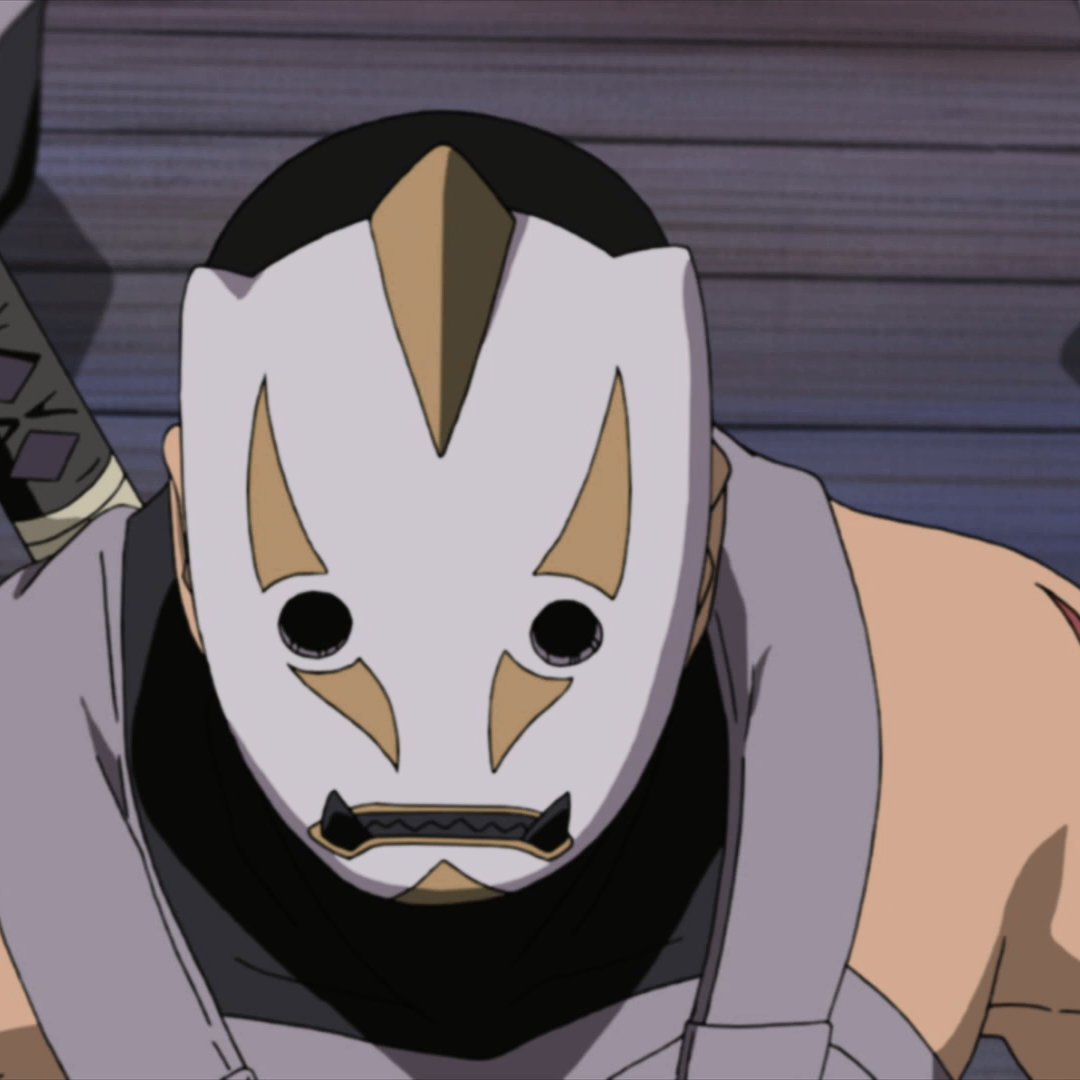

In [5]:
# text_search.show_grid(images) # dislay grid of returned images (optional)
images['image'][1]

Error in grid display ==> index 2 is out of bounds for axis 0 with size 2


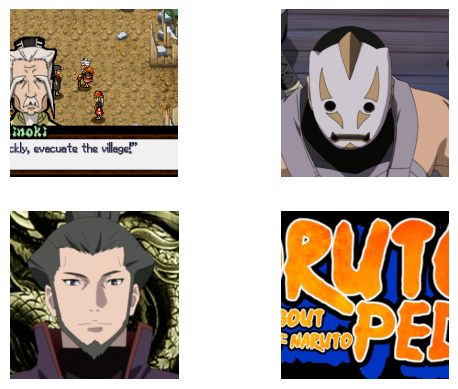

In [6]:
from matplotlib import pyplot as plt

def image_grid(images):
    # check if image  count matches grid arrangement
    try:
        image_len = len(images['image'])
        assert image_len % 2 == 0, "Choose an even number to enable grid-show"

        f, ax = plt.subplots(2, 2)
        for index in range(image_len):
            k, v = index // 2, index % 2
            # ax[k, v].set_title(images["image"][index].filename)
            ax[k, v].imshow(images["image"][index])
            ax[k, v].axis("off")

        plt.show()
    
    except Exception as e:
        print(f'Error in grid display ==> {e}')

image_grid(images)

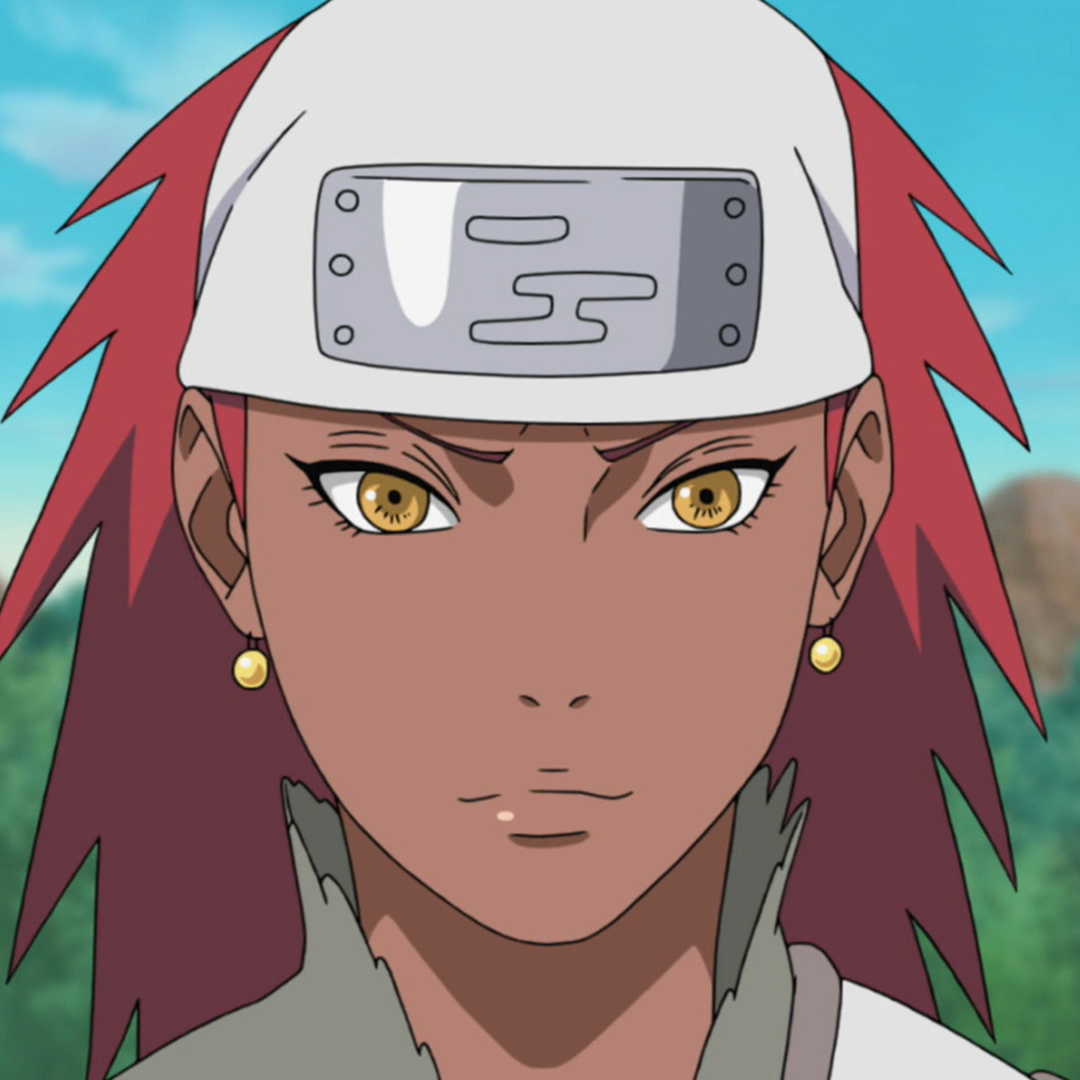

In [7]:
images['image'][-1]